<a href="https://colab.research.google.com/github/dataskeptic/similarities/blob/main/tf_tfidf__tok2vec_jaccard_distances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download pt_core_news_lg

2023-08-27 22:19:57.764138: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-27 22:20:01.851284: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 2.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')


In [ ]:
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
import pandas as pd
import numpy as np
import nltk
import re
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import spacy
nlp = spacy.load('pt_core_news_lg')

In [ ]:
def to_lowercase(data):
    return data.str.lower()

def remove_punct(data):
    return data.str.replace(r'[^\w\s]', ' ', regex=True)

def remove_stopwords(text):
    stop_words = spacy.lang.pt.stop_words.STOP_WORDS
    doc = nlp(text)
    return ' '.join([token.text for token in doc if token.text.lower() not in stop_words])

def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text, language='portuguese')
    return ' '.join([lemmatizer.lemmatize(token) for token in tokens])

def stem(text):
    stemmer = SnowballStemmer('portuguese')
    tokens = word_tokenize(text, language='portuguese')
    return ' '.join([stemmer.stem(token) for token in tokens])

def preprocess_text(data):
    data = remove_punct(data)
    data = to_lowercase(data)
    data = data.apply(remove_stopwords)
    #data = data.apply(lemmatize)
    data = data.apply(stem)
    return data


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

path_reference_answers = "drive/MyDrive/Colab Notebooks/PT_ASAG_2018_v2.0/reference_answers_extended.xlsx"
path_student_answers = "drive/MyDrive/Colab Notebooks/data/student_answers_and_grades_v2_other_graders_clean.xlsx"

reference_answers = pd.read_excel(path_reference_answers)
student_answers = pd.read_excel(path_student_answers)

print(reference_answers.head())
print("---------------------------------------")
print(student_answers)

   question_id                                        refans_text
0            1  A célula animal possui formato irregular e a c...
1            1  Nos vegetais, a célula apresenta, além da memb...
2            1  na celula vegetal há cloroplasto, parede celul...
3            1  A célula animal e vegetal apresentam formato d...
4            1  As células animais são todas aquelas que compõ...
---------------------------------------
      question_id                                        answer_text  grade
0               1               A animal tem núcleo e a vegetal não.      0
1               1                       uma tem núcleo e a outra não      0
2               1          animal tem nucleo e a animal n tem nucleo      0
3               1                           uma tem nucleo outra nao      0
4               1  A célula animal é composta por apenas uma célu...      0
...           ...                                                ...    ...
7189           15  É um processo

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

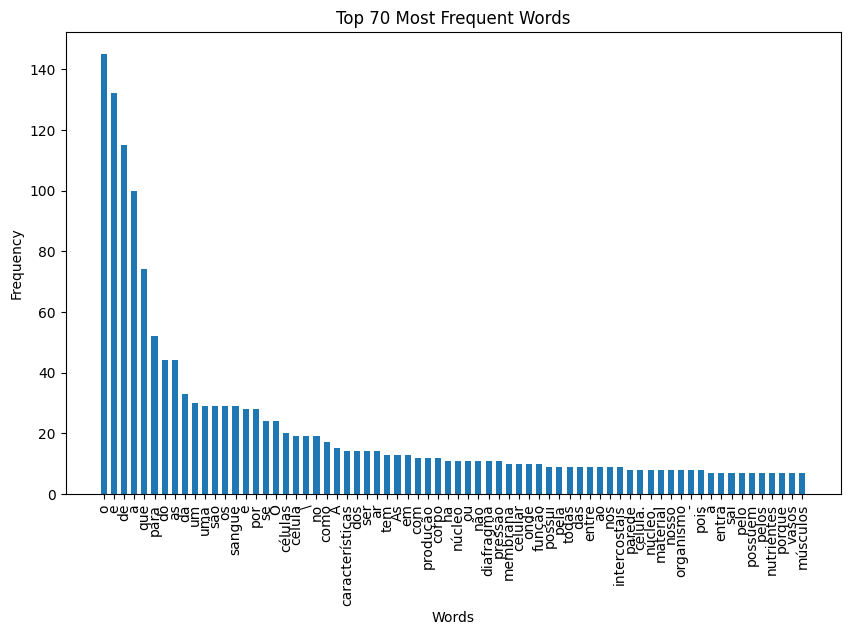

In [ ]:
all_words = [word for tokens in reference_answers['refans_text'] for word in tokens.split()]
word_frequency = Counter(all_words)
most_common_words = word_frequency.most_common()

top_n = 70  # You can adjust the number of most frequent words to plot
words, frequencies = zip(*most_common_words[:top_n])
plt.figure(figsize=(10, 6))

plt.bar(words, frequencies,width=0.6)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Most Frequent Words'.format(top_n))
plt.xticks(rotation=90)
plt.show()

In [ ]:
reference_answers['refans_preprocess'] = preprocess_text(reference_answers['refans_text'])

In [ ]:
print(reference_answers['refans_preprocess'])

0      célul animal possu format irregul célul vegeta...
1      veget célul apresent membran plasmát pared rev...
2      celul vegetal há cloroplast pared celul celulo...
3      célul animal vegetal apresent format diferenc ...
4      célul anim compõ ser viv rein animál compost m...
                             ...                        
115    process filtrag depur substânc indesej sang pa...
116                               filtr sang rim funcion
117    hemodiális proced máquin limp filtr sang sej t...
118                               filtr sang rim funcion
119    rins deix funcion hemodiális surg opçã tratame...
Name: refans_preprocess, Length: 120, dtype: object


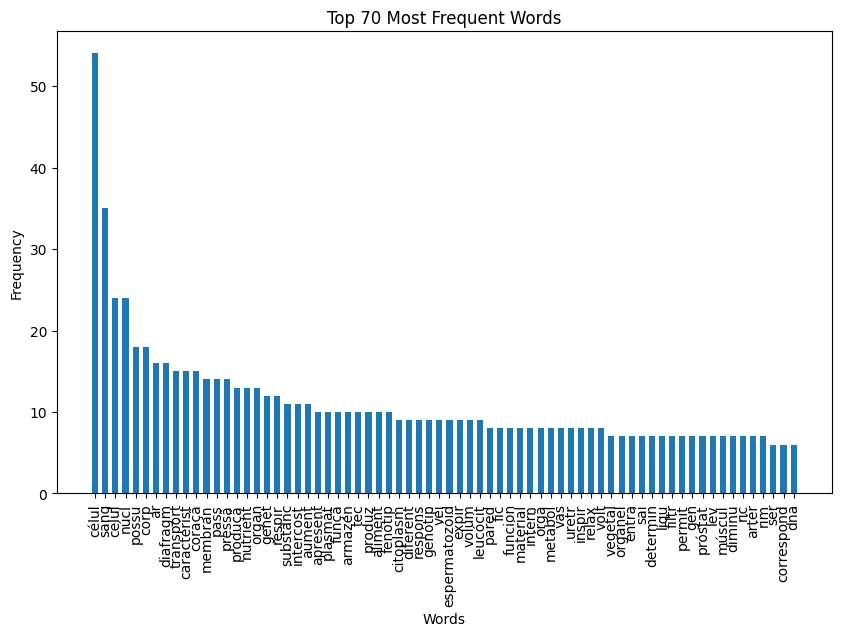

In [ ]:
all_words = [word for tokens in reference_answers['refans_preprocess'] for word in tokens.split()]
word_frequency = Counter(all_words)
most_common_words = word_frequency.most_common()

top_n = 70  # You can adjust the number of most frequent words to plot
words, frequencies = zip(*most_common_words[:top_n])
plt.figure(figsize=(10, 6))

plt.bar(words, frequencies,width=0.6)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Most Frequent Words'.format(top_n))
plt.xticks(rotation=90)
plt.show()

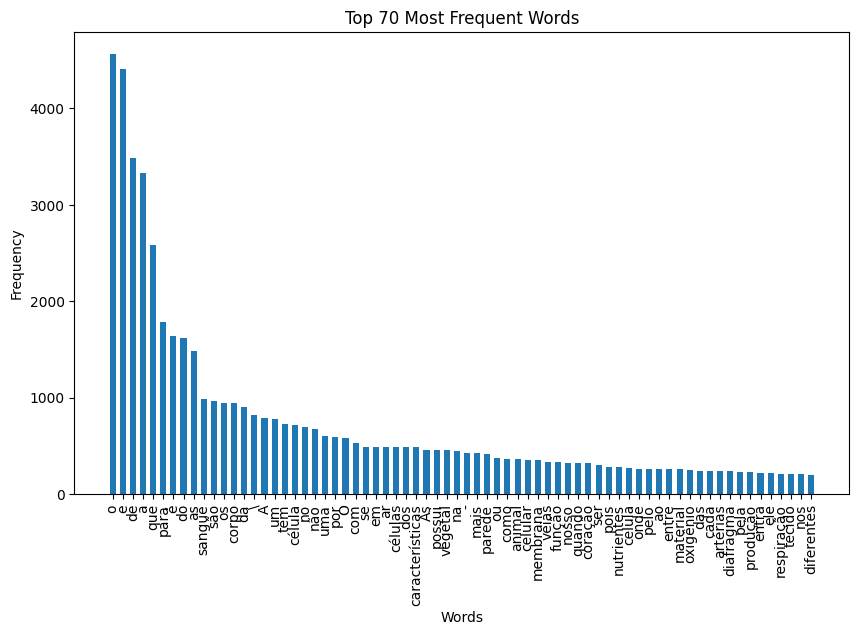

In [ ]:
all_words = [word for tokens in student_answers['answer_text'] for word in tokens.split()]
word_frequency = Counter(all_words)
most_common_words = word_frequency.most_common()

top_n = 70  # You can adjust the number of most frequent words to plot
words, frequencies = zip(*most_common_words[:top_n])
plt.figure(figsize=(10, 6))

plt.bar(words, frequencies,width=0.6)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Most Frequent Words'.format(top_n))
plt.xticks(rotation=90)
plt.show()

In [ ]:
student_answers['answer_text'] = student_answers['answer_text'].fillna('')

In [ ]:
student_answers['answer_preprocess'] = preprocess_text(student_answers['answer_text'])

In [ ]:
print(student_answers['answer_preprocess'])

0                                     animal núcl vegetal
1                                                    núcl
2                               animal nucl animal n nucl
3                                                nucl nao
4                  célul animal compost célul vegetal var
                              ...                        
7189                       process máquin limp filtr sang
7190     funcion rim artificial serv filtr impur sang lev
7191                                 funçã rim filtr sang
7192    hemodialis process máquin limp filtr sang faz ...
7193                                proced filtr sang rim
Name: answer_preprocess, Length: 7194, dtype: object


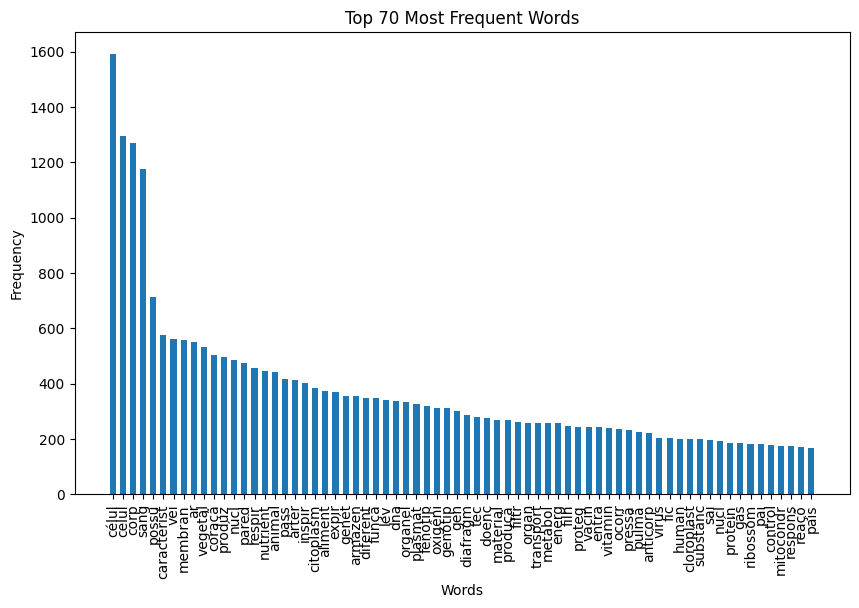

In [ ]:
all_words = [word for tokens in student_answers['answer_preprocess'] for word in tokens.split()]
word_frequency = Counter(all_words)
most_common_words = word_frequency.most_common()

top_n = 70  # You can adjust the number of most frequent words to plot
words, frequencies = zip(*most_common_words[:top_n])
plt.figure(figsize=(10, 6))

plt.bar(words, frequencies,width=0.6)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Most Frequent Words'.format(top_n))
plt.xticks(rotation=90)
plt.show()

In [ ]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
tf_vectorizer = CountVectorizer()

In [ ]:
tf_tfidf_similarities = pd.DataFrame()

for questionId in range(1, 16):
  temp_student_answers = student_answers[student_answers['question_id'] ==  questionId].copy()
  refans_tfidf = tfidf_vectorizer.fit_transform(reference_answers['refans_preprocess'][reference_answers['question_id'] == questionId].copy())
  refans_tf = tf_vectorizer.fit_transform(reference_answers['refans_preprocess'][reference_answers['question_id'] == questionId].copy())

  for index, row in temp_student_answers.iterrows():
    temp_answer_tfidf = tfidf_vectorizer.transform([temp_student_answers['answer_preprocess'][index]])
    temp_answer_tf = tf_vectorizer.transform([temp_student_answers['answer_preprocess'][index]])

    tfidf_cosine_similarity = ([(cosine_similarity(temp_answer_tfidf, ref_tfidf)[0][0]) for ref_tfidf in refans_tfidf])
    tf_cosine_similarity = ([(cosine_similarity(temp_answer_tf, ref_tf)[0][0]) for ref_tf in refans_tf])
    tfidf_similarities = max(tfidf_cosine_similarity), np.mean(tfidf_cosine_similarity), np.median(tfidf_cosine_similarity), min(tfidf_cosine_similarity)
    tf_similarities = max(tf_cosine_similarity), np.mean(tf_cosine_similarity), np.median(tf_cosine_similarity), min(tf_cosine_similarity)

    temp_student_answers.loc[index, ('max_cosine_tfidf', 'mean_cosine_tfidf', 'median_cosine_tfidf', 'min_cosine_tfidf')] = tfidf_similarities
    temp_student_answers.loc[index, ('max_cosine_tf', 'mean_cosine_tf', 'median_cosine_tf', 'min_cosine_tf')] = tf_similarities

  tf_tfidf_similarities = pd.concat([tf_tfidf_similarities, temp_student_answers])
print(tf_tfidf_similarities)
print(tf_tfidf_similarities)

      question_id                                        answer_text  grade  \
0               1               A animal tem núcleo e a vegetal não.      0   
1               1                       uma tem núcleo e a outra não      0   
2               1          animal tem nucleo e a animal n tem nucleo      0   
3               1                           uma tem nucleo outra nao      0   
4               1  A célula animal é composta por apenas uma célu...      0   
...           ...                                                ...    ...   
7189           15  É um processo onde uma máquina limpa e filtra ...      3   
7190           15  Funciona como um rim artificial. Serve para fi...      3   
7191           15       Faz a função do rim, que é filtrar o sangue.      3   
7192           15  A hemodialise é um processo na qual uma máquin...      3   
7193           15  Um procedimento que filtra o sangue quando o r...      3   

                                      answer_prepro

In [ ]:
def jaccard_similarity(sentence1, sentence2):
    # Tokenize the sentences
    set1 = set(sentence1.split())
    set2 = set(sentence2.split())

    # Calculate intersection and union of the two sets
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))

    # Calculate Jaccard similarity
    return intersection / union if union != 0 else 0



In [ ]:
jaccard_similarities = pd.DataFrame()

for questionId in range(1, 16):
  temp_student_answers = student_answers[student_answers['question_id'] ==  questionId].copy()
  refans = reference_answers['refans_preprocess'][reference_answers['question_id'] == questionId].copy()

  for index, row in temp_student_answers.iterrows():
    temp_answer = temp_student_answers['answer_preprocess'][index]


    jaccard_scores = ([(jaccard_similarity(temp_answer, ref)) for ref in refans])
    #tf_jaccard_similarity = ([(jaccard_score(temp_answer_tf, ref_tf)) for ref_tf in refans_tf])
    similarities = max(jaccard_scores),  np.mean(jaccard_scores), np.median(jaccard_scores), min(jaccard_scores)
    #tf_similarities = max(tf_jaccard_similarity), np.mean(tf_jaccard_similarity), np.median(tf_jaccard_similarity), min(tf_jaccard_similarity)

    temp_student_answers.loc[index, ('max_jaccard', 'mean_jaccard', 'median_jaccard', 'min_jaccard')] = similarities
    #temp_student_answers.loc[index, ('max_jaccard_tf', 'mean_jaccard_tf', 'median_jaccard_tf', 'min_jaccard_tf')] = tf_similarities

  jaccard_similarities = pd.concat([jaccard_similarities, temp_student_answers])
print(jaccard_similarities[['max_jaccard', 'mean_jaccard', 'median_jaccard', 'min_jaccard']])

      max_jaccard  mean_jaccard  median_jaccard  min_jaccard
0        0.200000      0.078648        0.073810         0.00
1        0.050000      0.006250        0.000000         0.00
2        0.090909      0.025296        0.000000         0.00
3        0.000000      0.000000        0.000000         0.00
4        0.272727      0.116870        0.088933         0.00
...           ...           ...             ...          ...
7189     0.363636      0.215115        0.211111         0.00
7190     0.500000      0.287500        0.291667         0.05
7191     0.600000      0.382955        0.464286         0.00
7192     0.500000      0.226605        0.225000         0.00
7193     0.600000      0.353477        0.387500         0.00

[7194 rows x 4 columns]


In [ ]:
tok2vec_similarities = pd.DataFrame()

for questionId in range(1, 16):
  temp_student_answers = student_answers[student_answers['question_id'] ==  questionId].copy()
  refans_tok2vec = (reference_answers['refans_preprocess'][reference_answers['question_id'] == questionId].copy())
  refans_tok2vec = [nlp(ref) for ref in refans_tok2vec]

  for index, row in temp_student_answers.iterrows():

    temp_answer_tok2vec = nlp(temp_student_answers['answer_preprocess'][index])

    tok2vec_cosine_similarity = ([temp_answer_tok2vec.similarity(ref_tok2vec) for ref_tok2vec in refans_tok2vec])
    similarities = max(tok2vec_cosine_similarity), np.mean(tok2vec_cosine_similarity), np.median(tok2vec_cosine_similarity), min(tok2vec_cosine_similarity)

    temp_student_answers.loc[index, ('max_cosine_tok2vec', 'mean_cosine_tok2vec', 'median_cosine_tok2vec', 'min_cosine_tok2vec')] = similarities

  tok2vec_similarities = pd.concat([tok2vec_similarities, temp_student_answers])
print(tok2vec_similarities[['max_cosine_tok2vec', 'mean_cosine_tok2vec', 'median_cosine_tok2vec', 'min_cosine_tok2vec']])

<ipython-input-72-411890e2e4e4>:12: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  tok2vec_cosine_similarity = ([temp_answer_tok2vec.similarity(ref_tok2vec) for ref_tok2vec in refans_tok2vec])
<ipython-input-72-411890e2e4e4>:12: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  tok2vec_cosine_similarity = ([temp_answer_tok2vec.similarity(ref_tok2vec) for ref_tok2vec in refans_tok2vec])
<ipython-input-72-411890e2e4e4>:12: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  tok2vec_cosine_similarity = ([temp_answer_tok2vec.similarity(ref_tok2vec) for ref_tok2vec in refans_tok2vec])
<ipython-input-72-411890e2e4e4>:12: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  tok2vec_cosine_similarity = ([temp_answer_tok2vec.similarity(ref_tok2vec) for ref_tok2vec in refans_tok2vec])
<ipython-input-72-411890e2e4e4>:12: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  tok2vec_cosine_simil

      max_cosine_tok2vec  mean_cosine_tok2vec  median_cosine_tok2vec  \
0               0.745484             0.489156               0.405702   
1               0.000000             0.000000               0.000000   
2               0.540398             0.330462               0.315088   
3               0.281553             0.113562               0.089905   
4               0.779100             0.544187               0.519232   
...                  ...                  ...                    ...   
7189            0.808348             0.592308               0.534806   
7190            0.866463             0.787997               0.807850   
7191            1.000000             0.819632               0.880823   
7192            0.833104             0.705286               0.692172   
7193            0.919529             0.815493               0.865338   

      min_cosine_tok2vec  
0               0.264259  
1               0.000000  
2               0.102688  
3               0.012333  


In [ ]:
columns = ['max', 'mean', 'median', 'min']

for size in columns:
  mean_cosine_tfidf = tf_tfidf_similarities[f'{size}_cosine_tfidf'].mean()
  median_cosine_tfidf = tf_tfidf_similarities[f'{size}_cosine_tfidf'].median()
  std_cosine_tfidf = tf_tfidf_similarities[f'{size}_cosine_tfidf'].std()
  min_cosine_tfidf = tf_tfidf_similarities[f'{size}_cosine_tfidf'].min()
  max_cosine_tfidf = tf_tfidf_similarities[f'{size}_cosine_tfidf'].max()

  print(f'{size.capitalize()} statistics:')
  print(f'Mean tfidf: {mean_cosine_tfidf:.2f}')
  print(f'Median tfidf: {median_cosine_tfidf:.2f}')
  print(f'Min tfidf: {min_cosine_tfidf:.2f}')
  print(f'Max tfidf: {max_cosine_tfidf:.2f}')
  print(f'Standard deviation tfidf: {std_cosine_tfidf:.2f}')
  print()

Max statistics:
Mean tfidf: 0.44
Median tfidf: 0.43
Min tfidf: 0.00
Max tfidf: 1.00
Standard deviation tfidf: 0.20

Mean statistics:
Mean tfidf: 0.19
Median tfidf: 0.18
Min tfidf: 0.00
Max tfidf: 0.56
Standard deviation tfidf: 0.10

Median statistics:
Mean tfidf: 0.16
Median tfidf: 0.16
Min tfidf: 0.00
Max tfidf: 0.57
Standard deviation tfidf: 0.11

Min statistics:
Mean tfidf: 0.04
Median tfidf: 0.00
Min tfidf: 0.00
Max tfidf: 0.35
Standard deviation tfidf: 0.05



In [ ]:
columns = ['max', 'mean', 'median', 'min']

for size in columns:
  mean_cosine_tf = tf_tfidf_similarities[f'{size}_cosine_tf'].mean()
  median_cosine_tf = tf_tfidf_similarities[f'{size}_cosine_tf'].median()
  std_cosine_tf = tf_tfidf_similarities[f'{size}_cosine_tf'].std()
  min_cosine_tf = tf_tfidf_similarities[f'{size}_cosine_tf'].min()
  max_cosine_tf = tf_tfidf_similarities[f'{size}_cosine_tf'].max()

  print(f'{size.capitalize()} statistics:')
  print(f'Mean tf: {mean_cosine_tf:.2f}')
  print(f'Median tf: {median_cosine_tf:.2f}')
  print(f'Min tf: {min_cosine_tf:.2f}')
  print(f'Max tf: {max_cosine_tf:.2f}')
  print(f'Standard deviation tf: {std_cosine_tf:.2f}')
  print()

Max statistics:
Mean tf: 0.50
Median tf: 0.50
Min tf: 0.00
Max tf: 1.00
Standard deviation tf: 0.22

Mean statistics:
Mean tf: 0.27
Median tf: 0.27
Min tf: 0.00
Max tf: 0.70
Standard deviation tf: 0.15

Median statistics:
Mean tf: 0.26
Median tf: 0.27
Min tf: 0.00
Max tf: 0.73
Standard deviation tf: 0.17

Min statistics:
Mean tf: 0.08
Median tf: 0.00
Min tf: 0.00
Max tf: 0.50
Standard deviation tf: 0.11



In [ ]:
columns = ['max', 'mean', 'median', 'min']

for size in columns:
  mean_jaccard = jaccard_similarities[f'{size}_jaccard'].mean()
  median_jaccard = jaccard_similarities[f'{size}_jaccard'].median()
  std_jaccard = jaccard_similarities[f'{size}_jaccard'].std()
  min_jaccard = jaccard_similarities[f'{size}_jaccard'].min()
  max_jaccard = jaccard_similarities[f'{size}_jaccard'].max()

  print(f'{size.capitalize()} statistics:')
  print(f'Mean jaccard: {mean_jaccard:.2f}')
  print(f'Median jaccard: {median_jaccard:.2f}')
  print(f'Min jaccard: {min_jaccard:.2f}')
  print(f'Max jaccard: {max_jaccard:.2f}')
  print(f'Standard deviation jaccard: {std_jaccard:.2f}')
  print()

Max statistics:
Mean jaccard: 0.24
Median jaccard: 0.20
Min jaccard: 0.00
Max jaccard: 1.00
Standard deviation jaccard: 0.18

Mean statistics:
Mean jaccard: 0.12
Median jaccard: 0.11
Min jaccard: 0.00
Max jaccard: 0.48
Standard deviation jaccard: 0.09

Median statistics:
Mean jaccard: 0.11
Median jaccard: 0.10
Min jaccard: 0.00
Max jaccard: 0.46
Standard deviation jaccard: 0.08

Min statistics:
Mean jaccard: 0.03
Median jaccard: 0.00
Min jaccard: 0.00
Max jaccard: 0.26
Standard deviation jaccard: 0.05



In [ ]:
columns = ['max', 'mean', 'median', 'min']

for size in columns:
  mean_cosine_tok2vec = tok2vec_similarities[f'{size}_cosine_tok2vec'].mean()
  median_cosine_tok2vec = tok2vec_similarities[f'{size}_cosine_tok2vec'].median()
  std_cosine_tok2vec = tok2vec_similarities[f'{size}_cosine_tok2vec'].std()
  min_cosine_tok2vec = tok2vec_similarities[f'{size}_cosine_tok2vec'].min()
  max_cosine_tok2vec = tok2vec_similarities[f'{size}_cosine_tok2vec'].max()

  print(f'{size.capitalize()} statistics:')
  print(f'Mean cosine_tok2vec: {mean_cosine_tok2vec:.2f}')
  print(f'Median cosine_tok2vec: {median_cosine_tok2vec:.2f}')
  print(f'Min cosine_tok2vec: {min_cosine_tok2vec:.2f}')
  print(f'Max cosine_tok2vec: {max_cosine_tok2vec:.2f}')
  print(f'Standard deviation cosine_tok2vec: {std_cosine_tok2vec:.2f}')
  print()

Max statistics:
Mean cosine_tok2vec: 0.65
Median cosine_tok2vec: 0.70
Min cosine_tok2vec: -0.03
Max cosine_tok2vec: 1.00
Standard deviation cosine_tok2vec: 0.25

Mean statistics:
Mean cosine_tok2vec: 0.49
Median cosine_tok2vec: 0.53
Min cosine_tok2vec: -0.08
Max cosine_tok2vec: 0.90
Standard deviation cosine_tok2vec: 0.21

Median statistics:
Mean cosine_tok2vec: 0.50
Median cosine_tok2vec: 0.53
Min cosine_tok2vec: -0.09
Max cosine_tok2vec: 0.94
Standard deviation cosine_tok2vec: 0.22

Min statistics:
Mean cosine_tok2vec: 0.28
Median cosine_tok2vec: 0.29
Min cosine_tok2vec: -0.18
Max cosine_tok2vec: 0.79
Standard deviation cosine_tok2vec: 0.21



In [ ]:
def similarity_to_score(similarity, median, mean, std):
    if similarity < (median - std)+0.1:
        score = 0
    elif similarity < median+0.05:
        score = 1
    elif similarity < (median + std)-0.05:
        score = 2
    else:
        score = 3
    return score

for size in columns:
    median_cosine_tf = tf_tfidf_similarities[f'{size}_cosine_tf'].median()
    mean_cosine_tf = tf_tfidf_similarities[f'{size}_cosine_tf'].mean()
    std_cosine_tf = tf_tfidf_similarities[f'{size}_cosine_tf'].std()

    tf_tfidf_similarities[f'{size}_grade_tf'] = tf_tfidf_similarities[f'{size}_cosine_tf'].apply(lambda sim: similarity_to_score(sim, median_cosine_tf, mean_cosine_tf, std_cosine_tf))

In [ ]:
def similarity_to_score(similarity, median, mean, std):
    if similarity < (median - std)+0.1:
        score = 0
    elif similarity < median+0.05:
        score = 1
    elif similarity < (median + std)-0.05:
        score = 2
    else:
        score = 3
    return score

for size in columns:
    median_cosine_tfidf = tf_tfidf_similarities[f'{size}_cosine_tfidf'].median()
    mean_cosine_tfidf = tf_tfidf_similarities[f'{size}_cosine_tfidf'].mean()
    std_cosine_tfidf = tf_tfidf_similarities[f'{size}_cosine_tfidf'].std()

    tf_tfidf_similarities[f'{size}_grade_tfidf'] = tf_tfidf_similarities[f'{size}_cosine_tfidf'].apply(lambda sim: similarity_to_score(sim, median_cosine_tfidf, mean_cosine_tfidf, std_cosine_tfidf))

In [ ]:
def similarity_to_score(similarity, median, mean, std):
    if similarity < (median - std)+0.1:
        score = 0
    elif similarity < median:
        score = 1
    elif similarity < (median + std)-0.1:
        score = 2
    else:
        score = 3
    return score

for size in columns:
    median_cosine_tok2vec = tok2vec_similarities[f'{size}_cosine_tok2vec'].median()
    mean_cosine_tok2vec = tok2vec_similarities[f'{size}_cosine_tok2vec'].mean()
    std_cosine_tok2vec = tok2vec_similarities[f'{size}_cosine_tok2vec'].std()

    tok2vec_similarities[f'{size}_grade_tok2vec'] = tok2vec_similarities[f'{size}_cosine_tok2vec'].apply(lambda sim: similarity_to_score(sim, median_cosine_tok2vec, mean_cosine_tok2vec, std_cosine_tok2vec))

In [ ]:
def similarity_to_score(similarity, median, mean, std):
    if similarity < (median - std):
        score = 0
    elif similarity < median:
        score = 1
    elif similarity < median + std:
        score = 2
    else:
        score = 3
    return score

for size in columns:
    median_jaccard = jaccard_similarities[f'{size}_jaccard'].median()
    mean_jaccard = jaccard_similarities[f'{size}_jaccard'].mean()
    std_jaccard = jaccard_similarities[f'{size}_jaccard'].std()

    jaccard_similarities[f'{size}_jaccard_grade'] = jaccard_similarities[f'{size}_jaccard'].apply(lambda sim: similarity_to_score(sim, median_jaccard, mean_jaccard, std_jaccard))

In [ ]:
from sklearn.metrics import cohen_kappa_score

In [ ]:
Kappa_max = cohen_kappa_score(tf_tfidf_similarities['grade'], tf_tfidf_similarities['max_grade_tf'])
Kappa_mean = cohen_kappa_score(tf_tfidf_similarities['grade'], tf_tfidf_similarities['mean_grade_tf'])
Kappa_median = cohen_kappa_score(tf_tfidf_similarities['grade'], tf_tfidf_similarities['median_grade_tf'])
Kappa_min = cohen_kappa_score(tf_tfidf_similarities['grade'], tf_tfidf_similarities['min_grade_tf'])


# Print the Cohen's Kappa metric
print("Max Cohen's Kappa:", Kappa_max)
print("Mean Cohen's Kappa:", Kappa_mean)
print("Median Cohen's Kappa:", Kappa_median)
print("Min Cohen's Kappa:", Kappa_min)

Max Cohen's Kappa: 0.17893024129967539
Mean Cohen's Kappa: 0.1646416258315686
Median Cohen's Kappa: 0.13963287624599185
Min Cohen's Kappa: 0.04473107523038822


In [ ]:
Kappa_max = cohen_kappa_score(tf_tfidf_similarities['grade'], tf_tfidf_similarities['max_grade_tf'],weights='linear')
Kappa_mean = cohen_kappa_score(tf_tfidf_similarities['grade'], tf_tfidf_similarities['mean_grade_tf'],weights='linear')
Kappa_median = cohen_kappa_score(tf_tfidf_similarities['grade'], tf_tfidf_similarities['median_grade_tf'],weights='linear')
Kappa_min = cohen_kappa_score(tf_tfidf_similarities['grade'], tf_tfidf_similarities['min_grade_tf'],weights='linear')


# Print the Cohen's Kappa metric
print("Max Cohen's Kappa:", Kappa_max)
print("Mean Cohen's Kappa:", Kappa_mean)
print("Median Cohen's Kappa:", Kappa_median)
print("Min Cohen's Kappa:", Kappa_min)

Max Cohen's Kappa: 0.3068648474004404
Mean Cohen's Kappa: 0.29362617597327567
Median Cohen's Kappa: 0.2614313267383471
Min Cohen's Kappa: 0.16705689112166355


In [ ]:
Kappa_max = cohen_kappa_score(tf_tfidf_similarities['grade'], tf_tfidf_similarities['max_grade_tf'],weights='quadratic')
Kappa_mean = cohen_kappa_score(tf_tfidf_similarities['grade'], tf_tfidf_similarities['mean_grade_tf'],weights='quadratic')
Kappa_median = cohen_kappa_score(tf_tfidf_similarities['grade'], tf_tfidf_similarities['median_grade_tf'],weights='quadratic')
Kappa_min = cohen_kappa_score(tf_tfidf_similarities['grade'], tf_tfidf_similarities['min_grade_tf'],weights='quadratic')


# Print the Cohen's Kappa metric
print("Max Cohen's Kappa:", Kappa_max)
print("Mean Cohen's Kappa:", Kappa_mean)
print("Median Cohen's Kappa:", Kappa_median)
print("Min Cohen's Kappa:", Kappa_min)

Max Cohen's Kappa: 0.4265752757384921
Mean Cohen's Kappa: 0.4099543790648946
Median Cohen's Kappa: 0.37717663443445004
Min Cohen's Kappa: 0.2866962340326109


In [ ]:
Kappa_max = cohen_kappa_score(tf_tfidf_similarities['grade'], tf_tfidf_similarities['max_grade_tfidf'])
Kappa_mean = cohen_kappa_score(tf_tfidf_similarities['grade'], tf_tfidf_similarities['mean_grade_tfidf'])
Kappa_median = cohen_kappa_score(tf_tfidf_similarities['grade'], tf_tfidf_similarities['median_grade_tfidf'])
Kappa_min = cohen_kappa_score(tf_tfidf_similarities['grade'], tf_tfidf_similarities['min_grade_tfidf'])


# Print the Cohen's Kappa metric
print("Max Cohen's Kappa:", Kappa_max)
print("Mean Cohen's Kappa:", Kappa_mean)
print("Median Cohen's Kappa:", Kappa_median)
print("Min Cohen's Kappa:", Kappa_min)

Max Cohen's Kappa: 0.17323959044813686
Mean Cohen's Kappa: 0.13894475195690037
Median Cohen's Kappa: 0.11777841987586246
Min Cohen's Kappa: 0.09191393249813573


In [ ]:
Kappa_max = cohen_kappa_score(tf_tfidf_similarities['grade'], tf_tfidf_similarities['max_grade_tfidf'], weights='linear')
Kappa_mean = cohen_kappa_score(tf_tfidf_similarities['grade'], tf_tfidf_similarities['mean_grade_tfidf'],weights='linear')
Kappa_median = cohen_kappa_score(tf_tfidf_similarities['grade'], tf_tfidf_similarities['median_grade_tfidf'],weights='linear')
Kappa_min = cohen_kappa_score(tf_tfidf_similarities['grade'], tf_tfidf_similarities['min_grade_tfidf'],weights='linear')


# Print the Cohen's Kappa metric
print("Max Cohen's Kappa:", Kappa_max)
print("Mean Cohen's Kappa:", Kappa_mean)
print("Median Cohen's Kappa:", Kappa_median)
print("Min Cohen's Kappa:", Kappa_min)

Max Cohen's Kappa: 0.28195799814402167
Mean Cohen's Kappa: 0.2622987110936513
Median Cohen's Kappa: 0.21406441987154223
Min Cohen's Kappa: 0.17910082878197087


In [ ]:
Kappa_max = cohen_kappa_score(tf_tfidf_similarities['grade'], tf_tfidf_similarities['max_grade_tfidf'], weights='quadratic')
Kappa_mean = cohen_kappa_score(tf_tfidf_similarities['grade'], tf_tfidf_similarities['mean_grade_tfidf'],weights='quadratic')
Kappa_median = cohen_kappa_score(tf_tfidf_similarities['grade'], tf_tfidf_similarities['median_grade_tfidf'],weights='quadratic')
Kappa_min = cohen_kappa_score(tf_tfidf_similarities['grade'], tf_tfidf_similarities['min_grade_tfidf'],weights='quadratic')


# Print the Cohen's Kappa metric
print("Max Cohen's Kappa:", Kappa_max)
print("Mean Cohen's Kappa:", Kappa_mean)
print("Median Cohen's Kappa:", Kappa_median)
print("Min Cohen's Kappa:", Kappa_min)

Max Cohen's Kappa: 0.38725988700564973
Mean Cohen's Kappa: 0.36854456548962233
Median Cohen's Kappa: 0.3026376523941058
Min Cohen's Kappa: 0.24695305949716462


In [ ]:
Kappa_max = cohen_kappa_score(tok2vec_similarities['grade'], tok2vec_similarities['max_grade_tok2vec'])
Kappa_mean = cohen_kappa_score(tok2vec_similarities['grade'], tok2vec_similarities['mean_grade_tok2vec'])
Kappa_median = cohen_kappa_score(tok2vec_similarities['grade'], tok2vec_similarities['median_grade_tok2vec'])
Kappa_min = cohen_kappa_score(tok2vec_similarities['grade'], tok2vec_similarities['min_grade_tok2vec'])


# Print the Cohen's Kappa metric
print("Max Cohen's Kappa:", Kappa_max)
print("Mean Cohen's Kappa:", Kappa_mean)
print("Median Cohen's Kappa:", Kappa_median)
print("Min Cohen's Kappa:", Kappa_min)

Max Cohen's Kappa: 0.15544799392743724
Mean Cohen's Kappa: 0.1494934914343241
Median Cohen's Kappa: 0.13680776801477312
Min Cohen's Kappa: 0.0900564758069744


In [ ]:
Kappa_max = cohen_kappa_score(tok2vec_similarities['grade'], tok2vec_similarities['max_grade_tok2vec'],weights='linear')
Kappa_mean = cohen_kappa_score(tok2vec_similarities['grade'], tok2vec_similarities['mean_grade_tok2vec'],weights='linear')
Kappa_median = cohen_kappa_score(tok2vec_similarities['grade'], tok2vec_similarities['median_grade_tok2vec'],weights='linear')
Kappa_min = cohen_kappa_score(tok2vec_similarities['grade'], tok2vec_similarities['min_grade_tok2vec'],weights='linear')


# Print the Cohen's Kappa metric
print("Max Cohen's Kappa:", Kappa_max)
print("Mean Cohen's Kappa:", Kappa_mean)
print("Median Cohen's Kappa:", Kappa_median)
print("Min Cohen's Kappa:", Kappa_min)

Max Cohen's Kappa: 0.2691451912667433
Mean Cohen's Kappa: 0.2646103427586495
Median Cohen's Kappa: 0.24564529021466863
Min Cohen's Kappa: 0.19627269040665718


In [ ]:
Kappa_max = cohen_kappa_score(tok2vec_similarities['grade'], tok2vec_similarities['max_grade_tok2vec'],weights='quadratic')
Kappa_mean = cohen_kappa_score(tok2vec_similarities['grade'], tok2vec_similarities['mean_grade_tok2vec'],weights='quadratic')
Kappa_median = cohen_kappa_score(tok2vec_similarities['grade'], tok2vec_similarities['median_grade_tok2vec'],weights='quadratic')
Kappa_min = cohen_kappa_score(tok2vec_similarities['grade'], tok2vec_similarities['min_grade_tok2vec'],weights='quadratic')


# Print the Cohen's Kappa metric
print("Max Cohen's Kappa:", Kappa_max)
print("Mean Cohen's Kappa:", Kappa_mean)
print("Median Cohen's Kappa:", Kappa_median)
print("Min Cohen's Kappa:", Kappa_min)

Max Cohen's Kappa: 0.3802471817801817
Mean Cohen's Kappa: 0.37239202353409595
Median Cohen's Kappa: 0.34826419949246934
Min Cohen's Kappa: 0.29133814448056106


In [ ]:
Kappa_max = cohen_kappa_score(jaccard_similarities['grade'], jaccard_similarities['max_jaccard_grade'])
Kappa_mean = cohen_kappa_score(jaccard_similarities['grade'], jaccard_similarities['mean_jaccard_grade'])
Kappa_median = cohen_kappa_score(jaccard_similarities['grade'], jaccard_similarities['median_jaccard_grade'])
Kappa_min = cohen_kappa_score(jaccard_similarities['grade'], jaccard_similarities['min_jaccard_grade'])


# Print the Cohen's Kappa metric
print("Max Cohen's Kappa:", Kappa_max)
print("Mean Cohen's Kappa:", Kappa_mean)
print("Median Cohen's Kappa:", Kappa_median)
print("Min Cohen's Kappa:", Kappa_min)

Max Cohen's Kappa: 0.1787125863483039
Mean Cohen's Kappa: 0.19198636939458025
Median Cohen's Kappa: 0.15644348017549503
Min Cohen's Kappa: -0.018310116267714616


In [ ]:
Kappa_min = cohen_kappa_score(tok2vec_similarities['grade'], tok2vec_similarities['grade_rule_base'])

# Print the Cohen's Kappa metric
print("Max Cohen's Kappa:", Kappa_min)

Max Cohen's Kappa: 0.05891226764861657


In [ ]:
tf_tfidf_similarities.to_csv('drive/MyDrive/Colab Notebooks/PT_ASAG_2018_v2.0/tf_idf_similarities.csv', index=False)

In [ ]:
def determine_grade(row, medians, stds):
    max_similarity, mean_similarity, median_similarity = row['max_cosine_tok2vec'], row['mean_cosine_tok2vec'], row['median_cosine_tok2vec']

    # Using respective thresholds for each measure
    max_high_threshold = medians['max_cosine_tok2vec'] + stds['max_cosine_tok2vec']
    mean_high_threshold = medians['mean_cosine_tok2vec'] + stds['mean_cosine_tok2vec']
    median_high_threshold = medians['median_cosine_tok2vec'] + stds['median_cosine_tok2vec']

    max_low_threshold = medians['max_cosine_tok2vec'] - stds['max_cosine_tok2vec']
    mean_low_threshold = medians['mean_cosine_tok2vec'] - stds['mean_cosine_tok2vec']
    median_low_threshold = medians['median_cosine_tok2vec'] - stds['median_cosine_tok2vec']

    # Adjusted rules with respective thresholds
    if max_similarity >= max_high_threshold and mean_similarity >= mean_high_threshold and median_similarity >= median_high_threshold:
        return 3
    elif max_similarity > max_high_threshold and (mean_similarity <= mean_high_threshold or median_similarity <= median_high_threshold):
        return 2
    elif (max_high_threshold >= max_similarity >= max_low_threshold) and (mean_high_threshold >= mean_similarity >= mean_low_threshold or median_high_threshold >= median_similarity >= median_low_threshold):
        return 1
    else:
        return 0

# Compute statistics for each column
medians = {
    'max_cosine_tok2vec': tok2vec_similarities['max_cosine_tok2vec'].median(),
    'mean_cosine_tok2vec': tok2vec_similarities['mean_cosine_tok2vec'].median(),
    'median_cosine_tok2vec': tok2vec_similarities['median_cosine_tok2vec'].median()
}

stds = {
    'max_cosine_tok2vec': tok2vec_similarities['max_cosine_tok2vec'].std(),
    'mean_cosine_tok2vec': tok2vec_similarities['mean_cosine_tok2vec'].std(),
    'median_cosine_tok2vec': tok2vec_similarities['median_cosine_tok2vec'].std()
}

# Apply grading function
tok2vec_similarities['grade_rule_base'] = tok2vec_similarities.apply(lambda row: determine_grade(row, medians, stds), axis=1)

In [ ]:
def determine_grade(row, medians, stds):
    max_similarity, mean_similarity, median_similarity = row['max_cosine_tfidf'], row['mean_cosine_tfidf'], row['median_cosine_tfidf']

    # Using respective thresholds for each measure
    max_high_threshold = medians['max_cosine_tfidf'] + stds['max_cosine_tfidf']
    mean_high_threshold = medians['mean_cosine_tfidf'] + stds['mean_cosine_tfidf']
    median_high_threshold = medians['median_cosine_tfidf'] + stds['median_cosine_tfidf']

    max_low_threshold = medians['max_cosine_tfidf'] - stds['max_cosine_tfidf']
    mean_low_threshold = medians['mean_cosine_tfidf'] - stds['mean_cosine_tfidf']
    median_low_threshold = medians['median_cosine_tfidf'] - stds['median_cosine_tfidf']

    # Adjusted rules with respective thresholds
    if max_similarity >= max_high_threshold and mean_similarity >= mean_high_threshold and median_similarity >= median_high_threshold:
        return 3
    elif max_similarity > max_high_threshold and (mean_similarity <= mean_high_threshold or median_similarity <= median_high_threshold):
        return 2
    elif (max_high_threshold >= max_similarity >= max_low_threshold) and (mean_high_threshold >= mean_similarity >= mean_low_threshold or median_high_threshold >= median_similarity >= median_low_threshold):
        return 1
    else:
        return 0

# Compute statistics for each column
medians = {
    'max_cosine_tfidf': tf_tfidf_similarities['max_cosine_tfidf'].median(),
    'mean_cosine_tfidf': tf_tfidf_similarities['mean_cosine_tfidf'].median(),
    'median_cosine_tfidf': tf_tfidf_similarities['median_cosine_tfidf'].median()
}

stds = {
    'max_cosine_tfidf': tf_tfidf_similarities['max_cosine_tfidf'].std(),
    'mean_cosine_tfidf': tf_tfidf_similarities['mean_cosine_tfidf'].std(),
    'median_cosine_tfidf': tf_tfidf_similarities['median_cosine_tfidf'].std()
}

# Apply grading function
tf_tfidf_similarities['grade_rule_base'] = tf_tfidf_similarities.apply(lambda row: determine_grade(row, medians, stds), axis=1)

In [ ]:
Kappa_max = cohen_kappa_score(tf_tfidf_similarities['grade'], tf_tfidf_similarities['max_grade_tf'])
Kappa_mean = cohen_kappa_score(tf_tfidf_similarities['grade'], tf_tfidf_similarities['mean_grade_tf'])
Kappa_median = cohen_kappa_score(tf_tfidf_similarities['grade'], tf_tfidf_similarities['median_grade_tf'])
Kappa_min = cohen_kappa_score(tf_tfidf_similarities['grade'], tf_tfidf_similarities['grade_rule_base'])


# Print the Cohen's Kappa metric
print("Max Cohen's Kappa:", Kappa_max)
print("Mean Cohen's Kappa:", Kappa_mean)
print("Median Cohen's Kappa:", Kappa_median)
print("Min Cohen's Kappa:", Kappa_min)

Max Cohen's Kappa: 0.1703118697875331
Mean Cohen's Kappa: 0.12810248663433843
Median Cohen's Kappa: 0.11450166545348095
Min Cohen's Kappa: 0.0608765049212624


In [ ]:
zero = 0
um = 0
dois = 0
tres = 0

def count_result(result):
    global zero, um, dois, tres
    if result == 0:
        zero = zero + 1
    elif result == 1:
        um = um + 1
    elif result == 2:
        dois = dois + 1
    elif result == 3:
        tres = tres + 1
    return result
tok2vec_similarities['max_grade_tok2vec'].apply(count_result)
print(zero, um, dois, tres)

1845 1753 2179 1419


In [ ]:
zero = 0
um = 0
dois = 0
tres = 0

def count_result(result):
    global zero, um, dois, tres
    if result == 0:
        zero = zero + 1
    elif result == 1:
        um = um + 1
    elif result == 2:
        dois = dois + 1
    elif result == 3:
        tres = tres + 1
    return result

tf_tfidf_similarities['grade'].apply(count_result)
print(zero, um, dois, tres)

2016 2412 1764 1004


In [ ]:
reference_answers.to_excel("drive/MyDrive/Colab Notebooks/PT_ASAG_2018_v2.0/preproces_reference_answers.xlsx")
student_answers.to_excel("drive/MyDrive/Colab Notebooks/PT_ASAG_2018_v2.0/preproces_student_answers_and_grades_clean.xlsx")